# CTSM Simulations at NEON Tower Sites -- Tutorial 

This tutorial is an introduction to running the Community Terrestrial Systems Model (CTSM) at NEON tower sites.  It will guide you through running a simulation and provides example visualization of the simulation results.

There are several configuration options of CTSM, and throughout this tutorial we will use the Community Land Model, CLM, configuration which is the climate and biogeochemistry mode of CTSM. Throughout the rest of this tutorial, we refer to the model as CLM version 5.1 (CLM5.1-BGC).
***

## In this tutorial

The tutorial has several components. Below you will find steps to: 
1. Set up and run a simulation
2. Explore CLM model data
3. Explore NEON observation data
4. Compare CLM and NEON latent heat flux data

Note that step 1 is the necessary step to run the simulation. If you would like to use this tutorial to explore the available data, please continue with steps 2-4.

***
**The tutorial uses a Jupyter Notebook.** A Jupyter Notebook is an interactive computing environment that enables the creation and sharing of documents that contain discrete cells of text or documentation and executable code, including plots. It allows users to access, run, and edit the code in a browser. To interact with this notebook:

- Execute or "run" cells of executable code (cells denoted with '[ ]:') using the play button in the menu at the top (see below image)

- The results of running code, such as plots, will appear below that cell

- Each step must be followed in order, otherwise you may encounter errors

![run cell](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/images/run_cell.png)

For more information on Jupyter notebooks please see their [user guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html). 
***

<h2> 1. Set up and run a simulation</h2>

*This step guides you through running a CLM model simulation for a NEON flux tower using meteorology observations from the tower. Here, the many steps to run CLM are condensed into a single function. If you would like a more advanced tutorial to change the model configuration or code, please see [tutorial not yet available] for additional instructions.* <br>

***
<h4>1.1 Select a NEON tower site to simulate.</h4>

NEON towers available for simulation include:  

>ABBY, BART, BLAN, CPER, DCFS, DSNY, GRSM, HARV, JERC, JORN, KONZ, MOAB, NOGP, OAES, ORNL, OSBS, SCBI, SERC, SOAP, SRER, STEI, TALL, TREE, UKFS, UNDE, WOOD.  

The [NEON website](https://www.neonscience.org/field-sites/explore-field-sites) describes tower sites in more detail.

Before running the below code, keep in mind:
- The executable code below selects the **ABBY** site for simulation. If you would like to simulate a different tower, select the NEON tower from the above list and change the 4-character site name inside the quotes below.
- The site must be defined correctly so you do not get an error in the next step.
    - use all capital letters 
    - double-check that the letters match one of the above site names

*Execute the the cell below by clicking on the play button in the menu bar above.*

In [1]:
#Change the 4-character NEON site below.
import os
os.environ['site'] = 'ABBY'

***
<h4>1.2 Create and run a NEON tower site simulation.</h4>  

The executable code below runs a python script, run_neon.py. This script

* creates (`create_newcase`)
* sets up (`case.setup`)
* compiles (`case.build`)
* runs (`case.submit`)
    
a simulation for the tower site you specified above for all years that tower meteorology data are available.

*Run the cell below. Note that this step downloads the input data (~7GB) required for the model simulation. It may take several minutes to run, so please be patient. Many things will print below the cell as data are downloaded and the model compiles.* 

In [ ]:
run_neon --neon-sites $site --output-root ~/CLM-NEON #>& run_neon.log

<br><br>You might see lines print that say 'ERROR 404: Not Found' and this is ok. You will also likely notice that many files are moved after the simulation completes. The model is done running when you see: 

>st_archive completed <br>
>Submitted job case.run with id None <br>
>Submitted job case.st_archive with id None <br>


If you see this message, great! You've created and run CTSM for the NEON tower you selected, and we'll look at simulation data next.

**Note** that you can also run the above line of code in your terminal shell but you will need to point to the location of the file:
`/opt/ncar/cesm2/tools/site_and_regional/run_neon.py --neon-sites <site> --output-root <path>`

More details about setting up and modifying simulations will be available in an upcoming tutorial. 

Additional information about CLM is available [on the website](https://www.cesm.ucar.edu/models/cesm2/land/), including [technical documentation](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/tech_note/index.html), a [user's guide](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/users_guide/index.html), and a [quickstart guide](https://escomp.github.io/CESM/release-cesm2/quickstart.html#create-a-case) to running other model configurations.
<br><br>
***

<h4> Optional </h4>

If you would like to see additional and more advanced options for running NEON tower site simulations, many are listed in the python script you just executed using a `--help` option. <p>

*Executing the below cell is optional and will print options available options in the `run_neon` python script*:

In [6]:
run_neon --help

usage: run_neon.py [-h] [-d] [-v] [-s]
                   [--neon-sites {ABBY,BARR,BART,BLAN,BONA,CLBJ,CPER,DCFS,DEJU,DELA,DSNY,GRSM,GUAN,HARV,HEAL,JERC,JORN,KONA,KONZ,LAJA,LENO,MLBS,MOAB,NIWO,NOGP,OAES,ONAQ,ORNL,OSBS,PUUM,RMNP,SCBI,SERC,SJER,SOAP,SRER,STEI,STER,TALL,TEAK,TOOL,TREE,UKFS,UNDE,WOOD,WREF,YELL,all} [{ABBY,BARR,BART,BLAN,BONA,CLBJ,CPER,DCFS,DEJU,DELA,DSNY,GRSM,GUAN,HARV,HEAL,JERC,JORN,KONA,KONZ,LAJA,LENO,MLBS,MOAB,NIWO,NOGP,OAES,ONAQ,ORNL,OSBS,PUUM,RMNP,SCBI,SERC,SJER,SOAP,SRER,STEI,STER,TALL,TEAK,TOOL,TREE,UKFS,UNDE,WOOD,WREF,YELL,all} ...]]
                   [--base-case BASE_CASE_ROOT] [--output-root OUTPUT_ROOT]
                   [--overwrite] [--setup-only] [--rerun] [--no-batch]
                   [--run-type {ad,postad,transient,sasu}]
                   [--run-length RUN_LENGTH] [--start-date START_DATE]
                   [--end-date END_DATE] [--run-from-postad]

|------------------------------------------------------------------|
|---------------------  Instruc

________
<h2> 2. Explore CTSM model data </h2>

Now that your simulation completed, we can explore the data.
There are countless ways of analyzing and processing model data. This tutorial uses matplotlib. 
***

<h4> 2.1 Locate model data </h4>
When the simulation completed, the data are transferred to the `archive` directory. There are files that include data for every day of the simulation, as well as files that average model variables monthly. <p>

*Run the code below to see a subset of the files listed.*

In [2]:
!ls ~/archive/$site.transient/lnd/hist/*2018*.nc |head -20

/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-01.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-02.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-03.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-04.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-05.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-06.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-07.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-08.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-09.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-10.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-11.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-12.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h1.2018-01-01

The list includes the file path and file names.

The file names are automatically generated and include
* the simulation name, which includes
    * the NEON site
    * the type of simulation (here the simulation is "transient", meaning the model ran for the full length of available data)
* the date of simulated data

The files are saved in netcdf format (denoted with the `.nc` file extension), a file format commonly used for storing large, multi-dimensional scientific variables.
Netcdf files are platform independent and self-describing; each file includes metadata that describes the data, including: **variables**, **dimensions**, and **attributes**.

The NEON tower simulations generate two types of files:
* `*h0*`: Variables that are averaged monthly. One file is available for every month of the simulation.
* `*h1*`: Variables that are recorded every 30 minutes. Values are aggregated into one file for each day of the simulation. Each file includes 48 data points.
****


<h4>2.2 Visualize the output </h4>
Here let's take a quick look at our ouput and try visualizing it. 

Here we are going to use the existing function, `quick_soil_profile` to check the soil_profile . 

This function takes the simulation path and name of a case and one variable such as soil temperature `TSOI` in this case- and plots the soil profile with x-axis showing time and y-axis representing soil depth. 

We'll look at more advanced visualizations in the next tutorial lessons.


All Simulation files: [ 365 files]
Reading all simulation files [ 365 files] took: 31.26105237007141 s.


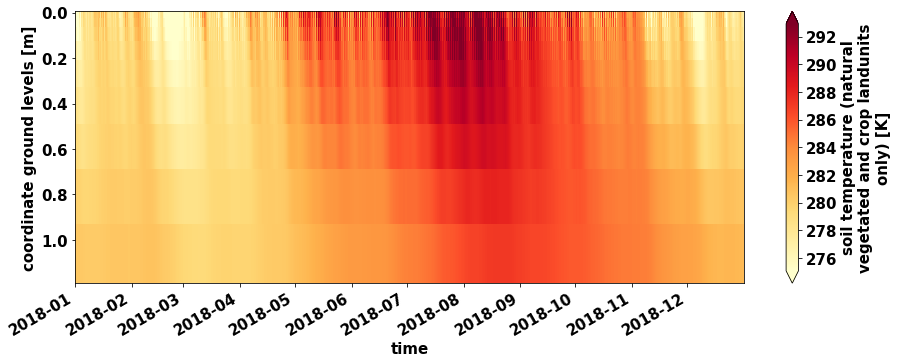

In [2]:
from neon_utils import quick_soil_profile

neon_site = "ABBY"
sim_path = "/home/user/archive/"+neon_site+".transient/lnd/hist/"
case_name = neon_site+".transient.clm2"
year = 2018

quick_soil_profile(sim_path, case_name, 'TSOI', year)

And we can do a similar plot for soil water (`H2OSOI`) just as easily:

All Simulation files: [ 365 files]
Reading all simulation files [ 365 files] took: 32.71104955673218 s.


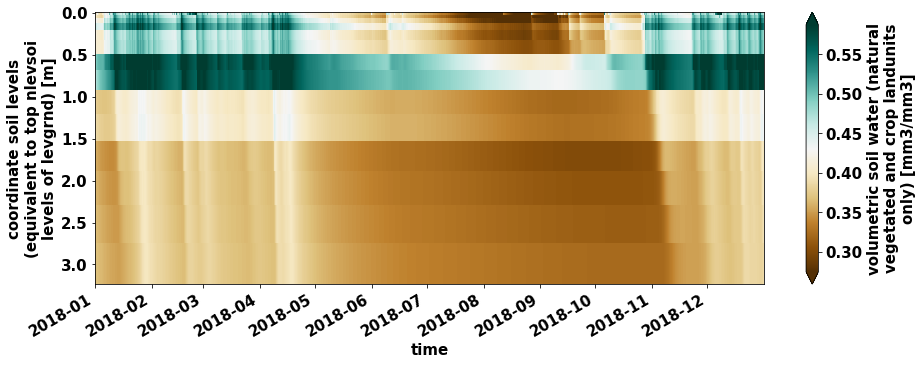

In [5]:
quick_soil_profile(sim_path, case_name, 'H2OSOI', year)

#### Congratulations! 
You have now completed a neon simulation and walked through the basic steps of a neon simulation.
Please proceed to the next notebook for simple visualization and evaluation of your neon simulation against neon observation. 

***Danica I will remove from this and go to the next notebook***

______________________________________________________________

<h4>2.2 Preprocess and Explore Model Simulation Data </h4>

This step has several components, which are broken into smaller steps


<h5>2.2.1 Load Python Libraries</h5>

*Run the below code to import the required python libraries*

In [ ]:
## TODO: clean up imports
#Import Libraries
%matplotlib inline

import os
import sys
import glob
import time
import argparse
import requests

import numpy as np
import pandas as pd
import xarray as xr


from glob import glob
from os.path import join, expanduser

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats


<h5>2.2.2 Select Simulation Year</h5>

For simplicity, we focus on analyzing and evaluating a single year of data. <p>

The code below uses data for **2018**, but data are available through this year. You can select a different year by changing the year in the quotes below. <p> 
*Run the below code to identify the year of interest for making the plots. Note that the same year will be used to download observational data below*

In [ ]:
#Specify the year below
year = "2018"

#Reading in the tower site selected above as a python variable
neon_site = os.environ['site']

<h5>2.2.3 Load model data files</h5>

For reading the netCDF files, we are using the `xarray` Python package. You can learn more about [xarray on this website](http://xarray.pydata.org/en/stable/).

The variable `sim_path` points to the location where simulation data are stored. *If you changed the simulation location in the above code, please also update this path.*

*Run the code below to load the model data files. Note that the code will print how many files were loaded*

In [ ]:
sim_path = "/home/user/archive/"+neon_site+".transient/lnd/hist/"
sim_files = sorted(glob(join(sim_path,neon_site+".transient.clm2.h1."+year+"*.nc")))

print("All Simulation files: [", len(sim_files), "files]")
#print(*sim_files,sep='\n')

<h5> 2.2.4 Open model data files </h5>

Here we use the python function `xarray.open_mfdataset`, which opens multiple netcdf files as a single xarray dataset. For more information on this function, check [this link](
http://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html).

*Run the below cell to read in the data files. Note that this step might take a few minutes.*

In [ ]:
start = time.time()

ds_ctsm = xr.open_mfdataset(sim_files, decode_times=True, combine='by_coords',parallel=True)

end = time.time()
print("Reading all simulation files took:", end-start, "s.")


<h5> 2.2.5 Optional Step: Explore simulation data </h5>

*Run the below cell to find more information about the data*

In [ ]:
ds_ctsm

Here you can click on `Data Variables`, `Attributes`, `Deminsions`, and `coordinates` to expand and see the details. 

If you click on `Data Variables`, you will see a list of all the available variables. You can click on each variable to see a description of the variable (the `long_name`) and its `units`, as well as other information. Here are two questions to consider:

**Questions to consider** 
1. What are the avaibale variables in the dataset?
2. What is the `long_name` and `unit` of the variable `FSH`? 
3. Can you find the dimensions of this variable? 

**Tip**: Xarray has built-in plotting functions. For quick inspection of a variable, we can use `.plot()` to see it. Below, let's make a quick plot of the Gross Primary Production (`GPP`) variable:

In [ ]:
ds_ctsm['GPP'].plot()

________
<h2> 3. Explore NEON Tower Observation Data </h2>

***

<h4> 3.1 Load NEON data </h4>
    
The following code will download the NEON observational data files for the site and year specified above. 

*Run the two cells of code below. You will see what files are available.*

In [ ]:
eval_dir = "/home/user/evaluation_files/"

download_eval_files(neon_site, eval_dir)

eval_path = os.path.join('/home/user/evaluation_files/',neon_site)

eval_files = sorted(glob(join(eval_path,neon_site+"_eval_"+year+"*.nc")))

print("All Observation files:")
print(*eval_files,sep='\n')

In [ ]:
start = time.time()

ds_eval = xr.open_mfdataset(eval_files, decode_times=True, combine='by_coords')

end = time.time()
print("Reading all observation files took:", end-start, "s.")

<h4> 3.2 Optional Step: Explore NEON data </h4>

Similar to above, you can explore NEON data by clicking to see details about the variables, coordinate, and attributes.

In [ ]:
ds_eval

Let's quickly inspect the Net Radiation (`Rnet`) variable by making a simple plot:

In [ ]:
ds_eval['Rnet'].plot()

__________
# 4. Compare CTSM and NEON latent heat flux data

So far we read files of observational and model data. In this section we will compare observed and simulated **latent heat fluxes**. You can also explore other available variables with this code.
***

#### Format Data
The next cell of code processes the data into a common format to make analysis easier. 

*Run the below cell of code*

In [ ]:
#Negin will clean up this code a little bit

#Convert CTSM data to a Pandas Dataframe for easier handling:
plot_vars = ['FCEV', 'FCTR', 'FGEV']

df_ctsm = pd.DataFrame({'time':ds_ctsm.time})

for var in plot_vars:
    field = np.ravel ( ds_ctsm[var])     
    df_ctsm[var]=field

#Convert NEON data to a Pandas Dataframe for easier handling:
eval_vars = ['EFLX_LH_TOT']

df_eval = pd.DataFrame({'time':ds_eval.time})

for var in eval_vars:
    field = np.ravel ( ds_eval[var])     
    df_eval[var]=field

#-- extract year, month, day, hour information from time
df_eval['year'] = df_eval['time'].dt.year
df_eval['month'] = df_eval['time'].dt.month
df_eval['day'] = df_eval['time'].dt.day
df_eval['hour'] = df_eval['time'].dt.hour

#-- make df_all that includes both obs and sim
df_all = df_eval

#-- add simulation data to df_all and adjust for offset time dimension:
for var in plot_vars:
    sim_var_name = "sim_"+var
    #-- shift simulation data by one
    df_all[sim_var_name]=df_ctsm[var].shift(-1).values

## 4.1 What is latent heat flux?

Below we explore how well CTSM simulates latent heat flux, which is directly observed at NEON towers. Latent heat flux is the energy for water evaporation from the ecosystem. Latent heat flux is a combination of plant transpiration, evaporation from leaf surfaces (e.g., from dew, after precipitation events), and evaporation from the soil:

$$ Latent Heat Flux = Transpiration + Canopy Evaporation + Ground Evaporation $$

Although NEON towers cannot distinguish how much each of these processes contributes to latent heat flux, CTSM simulations can help us to disentangle the role of each. 

First we will calculate latent heat flux simulated by CTSM by summing the component fluxes in the above equation. The CTSM variables are:

>$FCEV$: Canopy evaporation (W m<sup>-2</sup>) <br>
>$FCTR$: Canopy transpiration (W m<sup>-2</sup>) <br>
>$FGEV$: Ground evaporation (W m<sup>-2</sup>) <br>

*Run the below cell to calculate simulated latent heat flux*

In [ ]:
clm_var = 'sim_EFLX_LH_TOT'

#EFLX_LH_TOT = FCEV + FCTR +FGEV
df_all [clm_var] = df_ctsm['FCEV'].shift(-1).values \
                 + df_ctsm['FCTR'].shift(-1).values \
                 + df_ctsm['FGEV'].shift(-1).values

## 4.2 Plotting latent heat flux

### 4.2.1 Timeseries Plot
First we will create a time-series plot comparing daily average latent heat flux from observation (NEON) and simulations (CTSM). To start, we need calculate the daily averages. 

*Run the below cells of code to calculate daily averages*

In [ ]:
df_daily = df_all.groupby(['year','month','day']).mean().reset_index()
df_daily['time']=pd.to_datetime(df_daily[["year", "month", "day"]])

In [ ]:
plot_var = 'EFLX_LH_TOT'
sim_var = 'sim_'+plot_var

plot_var_desc = "Latent Heat Flux"
plot_var_unit= "Wm-2"

Using the daily averages we calculated, we can create a plot using Python's [matplotlib package:](https://matplotlib.org/)

*Run the below cell to create the plot*

In [ ]:
plt.figure(num=None, figsize=(13, 5),  facecolor='w', edgecolor='k')
        
ax = plt.gca()
df_daily.plot ( x= 'time', y = plot_var , marker = 'o' ,ax =ax , color = 'b',label="NEON")
df_daily.plot ( x= 'time', y = 'sim_'+plot_var , marker = 'o' ,ax =ax , color = 'r',label="CLM")

plt.xlabel('Time', fontsize=17)
plt.ylabel(plot_var_desc+" ["+plot_var_unit+"]", fontsize=17)
plt.title(year+" "+neon_site, fontweight='bold',fontsize=17)
plt.show()
plt.savefig("2018_ABBY_TSeries_Daily_Ave_V2.png")

#plt.savefig(year+"_"+neon_site+"_TSeries_Daily_Ave_V2.png")
##TO DO: Update the file name to use the site name. Does above line work? 

Looking at variability gives us an indication of when and where simulations are outside the range of observed values. Let's explore variability by adding the daily standard deviation as a shaded area to the plot:

In [ ]:
df_daily_std = df_all.groupby(['year','month','day']).std().reset_index()
df_daily_std['time'] = pd.to_datetime(df_daily_std[["year", "month", "day"]])

plt.figure(num=None, figsize=(13, 5),  facecolor='w', edgecolor='k')

plt.plot ( df_daily.time, df_daily[plot_var], marker = 'o' , color = 'b',label="NEON")
plt.plot ( df_daily.time, df_daily[sim_var], marker = 'o' , color = 'r',label="CLM")

plt.fill_between(df_daily.time, df_daily.EFLX_LH_TOT-df_daily_std.EFLX_LH_TOT, df_daily.EFLX_LH_TOT+df_daily_std.EFLX_LH_TOT ,alpha=0.1, color = 'b')
plt.fill_between(df_daily.time, df_daily.sim_EFLX_LH_TOT-df_daily_std.sim_EFLX_LH_TOT, df_daily.sim_EFLX_LH_TOT+df_daily_std.sim_EFLX_LH_TOT ,alpha=0.1, color = 'r')

plt.legend()
plt.xlabel('Time', fontsize=17)
plt.ylabel(plot_var_desc+" ["+plot_var_unit+"]", fontsize=17)
plt.title(year+" "+neon_site, fontweight='bold',fontsize=17)
plt.show()
plt.savefig("2018_ABBY_TSeriesShaded_Daily_Ave_V2.png")

This allows us to see when CTSM under-predicts or over-predicts the NEON tower observations.

#### **Questions to consider:**

1. When is the latent heat hlux highest at this site? When is it lowest? <br>
1. Does CLM match NEON tower observations? <br>
1. What times of year does CLM shows the best and worst performance in predicting latent heat flux ? <br>

# Congratulations! You have:
1. Completed a CTSM simulation at a NEON tower
1. Accessed the CTSM model data
1. Examined one of the model variables

### If you would like to learn more about evaluating CTSM against NEON observations, please continue to the **NEON_Evaluation_Simple.ipynb** tutorial